Predicted: 2


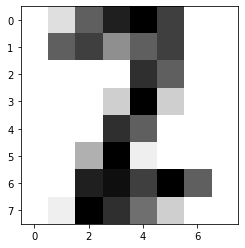

In [2]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# The digits dataset
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create support vector classifier
classifier = svm.SVC(gamma=0.001)

# Split into train and test subsets (50% each)
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# test on second half of data
n = np.random.randint(int(n_samples/2),n_samples)
plt.imshow(digits.images[n], cmap=plt.cm.gray_r, interpolation='nearest')
print('Predicted: ' + str(classifier.predict(digits.data[n:n+1])[0]))
plt.show()

Train Classifiers
nb time: 0.0
lr time: 2.23205
sgd time: 0.08151
knn time: 0.03334
dt time: 0.01799
rfm time: 1.23234
svm time: 0.12379
nn time: 1.19195
Test Classifiers
nb predicts: 8 time: 0.0
lr predicts: 8 time: 0.0
sgd predicts: 8 time: 0.0
knn predicts: 8 time: 0.0
dt predicts: 8 time: 0.0
rfm predicts: 8 time: 0.01776
svm predicts: 8 time: 0.0
nn predicts: 8 time: 0.0
Label: 8


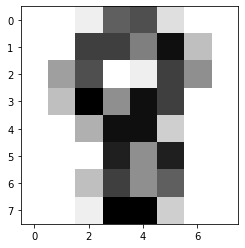

In [8]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import time

# The digits dataset
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split into train and test subsets (50% each)
XA, XB, yA, yB = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs',multi_class='auto',max_iter=2000)

# Naïve Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='modified_huber', shuffle=True,random_state=101,\
                    tol=1e-3,max_iter=1000)

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=10,random_state=101,\
                               max_features=None,min_samples_leaf=5)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(n_estimators=70,oob_score=True,n_jobs=1,\
                  random_state=101,max_features=None,min_samples_leaf=3)

# Support Vector Classifier
from sklearn.svm import SVC
svm = SVC(gamma='scale', C=1.0, random_state=101)

# Neural Network
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs',alpha=1e-5,max_iter=200,\
                    activation='relu',hidden_layer_sizes=(10,30,10),\
                    random_state=1, shuffle=True)

# classification methods
m = [nb,lr,sgd,knn,dtree,rfm,svm,nn]
s = ['nb','lr','sgd','knn','dt','rfm','svm','nn']

# fit classifiers
print('Train Classifiers')
for i,x in enumerate(m):
    st = time.time()
    x.fit(XA,yA)
    tf = str(round(time.time()-st,5))
    print(s[i] + ' time: ' + tf)

# test on random number in second half of data
n = np.random.randint(int(n_samples/2),n_samples)
Xt = digits.data[n:n+1]

# test classifiers
print('Test Classifiers')
for i,x in enumerate(m):
    st = time.time()
    yt = x.predict(Xt)
    tf = str(round(time.time()-st,5))
    print(s[i] + ' predicts: ' + str(yt[0]) + ' time: ' + tf)
print('Label: ' + str(digits.target[n:n+1][0]))

plt.imshow(digits.images[n], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()